In [15]:
import json 
import requests
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.stats import pearsonr

In [16]:
# Opening JSON file 
f = open('data.json',) 
data = json.load(f)
f.close()

In [17]:
songs = {} # dictionary of year:dictionary of songs

for i in range(0, len(data)):
    songs[data[i]['year']] = data[i]['songs']

In [18]:
# get averages for sentiment categories for each year
catagories = ['pos', 'neu', 'neg', 'compound']
averages = [[],[],[],[]]

for i in range(0, len(songs)):
    for j in range(0, 4):
        temp = []
        for x in songs[i + 1950]:
            temp.append(x['sentiment'][catagories[j]])
        averages[j].append(sum(temp)/len(temp))

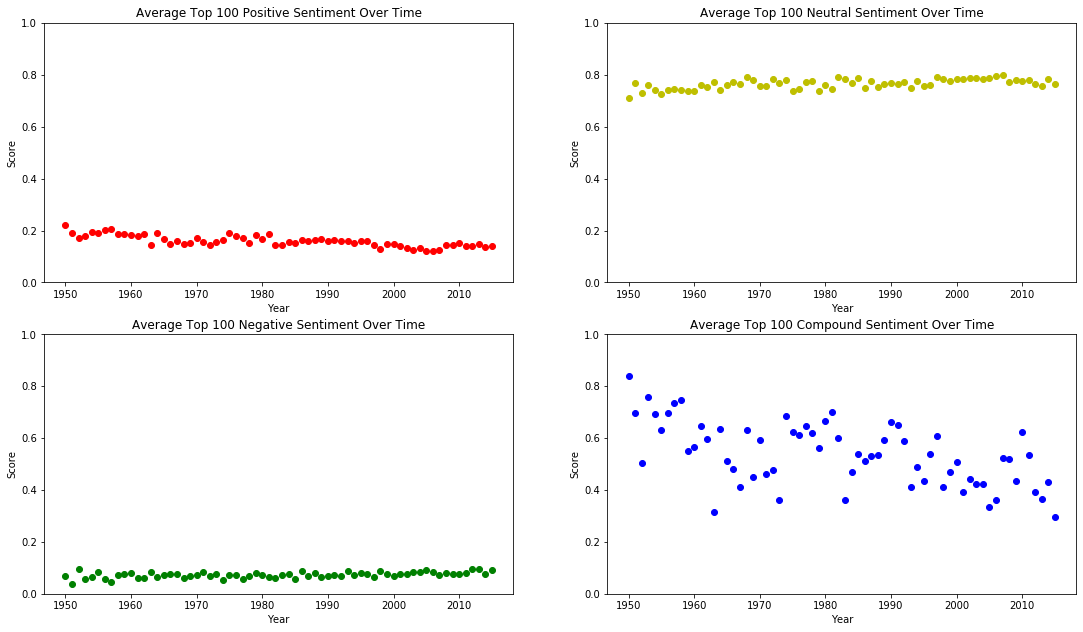

In [19]:
# plot sentiment results
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

colors = ['r','y','g','b']
titles = ["Positive", "Neutral", "Negative", "Compound"]

for i in range(2):
    for j in range(2):
        index = int(str(i) + str(j), 2)
        axs[i][j].scatter(range(1950, 2016), averages[index], color=colors[index])
        axs[i][j].set_ylim(0, 1.0)  
        axs[i][j].set_xlabel("Year")
        axs[i][j].set_ylabel("Score")
        axs[i][j].set_title("Average Top 100 " + titles[index] + " Sentiment Over Time")
        # add a trendline

In [20]:
# get averages for creativity
c_scores = []

for i in range(0, len(songs)):
    temp = []
    for x in songs[i + 1950]:
        temp.append(x['num_dupes']/x['num_lines'])
    c_scores.append(sum(temp)/len(temp))

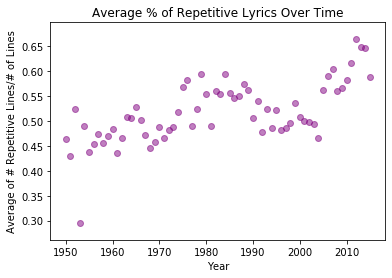

In [21]:
# plot creativity results

plt.scatter(range(1950, 2016), c_scores, c='purple', alpha=0.5)
plt.title("Average % of Repetitive Lyrics Over Time")
plt.xlabel("Year")
plt.ylabel("Average of # Repetitive Lines/# of Lines")

plt.show()

In [22]:
# genre evolution
genres = set() # set of all genres
genre_counts = {} # decade: Counter of genre tags
counts = {} # decade: total number of tags
decades = [x for x in range(1950,2015,10)]

for i in range(0, len(songs)):
    
    if i % 10 == 0: 
        genre_counts[i+1950] = []
        temp = genre_counts[i+1950]

    for x in songs[i + 1950]:
        for y in x['tags']:
            temp.append(y)
            genres.add(y)
            
for k,v in genre_counts.items():
    genre_counts[k] = Counter(v)
    counts[k] = len(v)

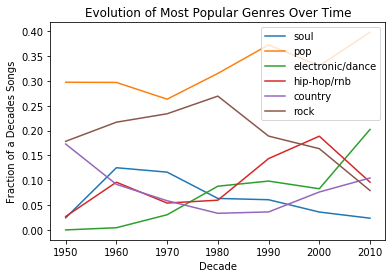

In [24]:
lines = [] # hold return object for each line
g = []
for x in genres:
    c = [genre_counts[y][x]/counts[y] for y in decades]
    if sum(c)/len(c) >= 0.05:
        temp, = plt.plot(decades, c)
        g.append(x)
        lines.append(temp)
    
plt.title("Evolution of Most Popular Genres Over Time")
plt.xlabel("Decade")
plt.ylabel("Fraction of a Decades Songs")
plt.legend(lines, g) # create legend

In [12]:
# Opening JSON file for event sentiment analysis
f = open('events.json',) 
data = json.load(f)
f.close()

In [13]:
event_sentiment = [] # from 1950 to 2015
sia = SentimentIntensityAnalyzer() 
for k, v in data.items():
    event_sentiment.append(sia.polarity_scores(v)['compound'])

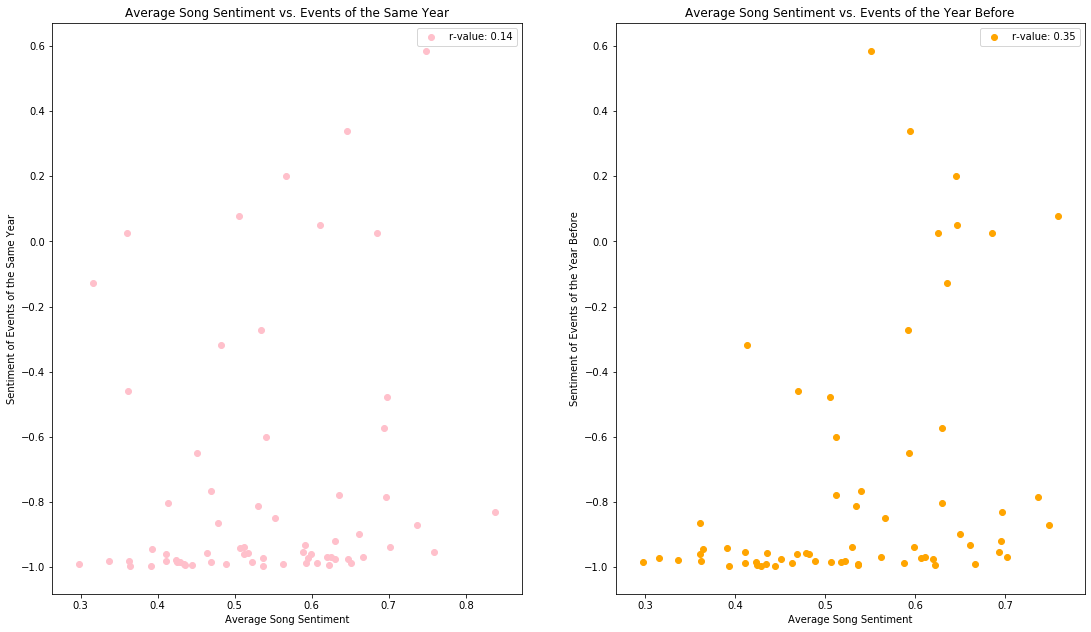

In [14]:
# correlation graphing
# plot sentiment results
fig, axs= plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)

colors = ['pink', 'orange']
titles = ["Events of the Same Year", "Events of the Year Before"]

for i in range(2):
        x = averages[3] if i==0 else averages[3][1:]
        y = event_sentiment if i==0 else event_sentiment[0:-1]
        r_value, p = pearsonr(x, y) # calculate correlation
        line = axs[i].scatter(x, y, color=colors[i], label='r-value: {:4.2f}'.format(r_value))
        axs[i].set_xlabel("Average Song Sentiment")
        axs[i].set_ylabel("Sentiment of " + titles[i])
        axs[i].set_title("Average Song Sentiment vs. " + titles[i])
        axs[i].legend(handles=[line])